In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
from transform_attention_weights_lib import transform_attention_weights
from aggregation_sentence_information_lib import aggregate_weight_information_for_sentences

from visualize_attention_weights import *
%matplotlib inline

In [2]:
weights = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\pretrained_attention_weights.npy")
parent_idx = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\parent_idx.npy")
scores = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\scores.npy")
result_dict = pickle.load(open(r"E:\graphsum\data\attention_weights_with_meta_information\save_dict" ,"rb"))

finished_scores_array = result_dict["scores_array"]

In [3]:
cleaned_weight_matrix, cleaned_score_matrix = transform_attention_weights(weights, parent_idx, scores, result_dict)

In [4]:
r = aggregate_weight_information_for_sentences(cleaned_weight_matrix, result_dict)

In [85]:
np.argsort(np.mean(np.mean(r["Mean"][0,:,:,0,0,:],axis=1),axis=0))

array([29, 23, 24, 25, 14, 10, 28,  9, 20, 22, 21,  7, 26,  8,  5, 11, 13,
       27, 17,  6, 18, 19, 12, 16,  3,  4,  2,  1, 15,  0], dtype=int64)

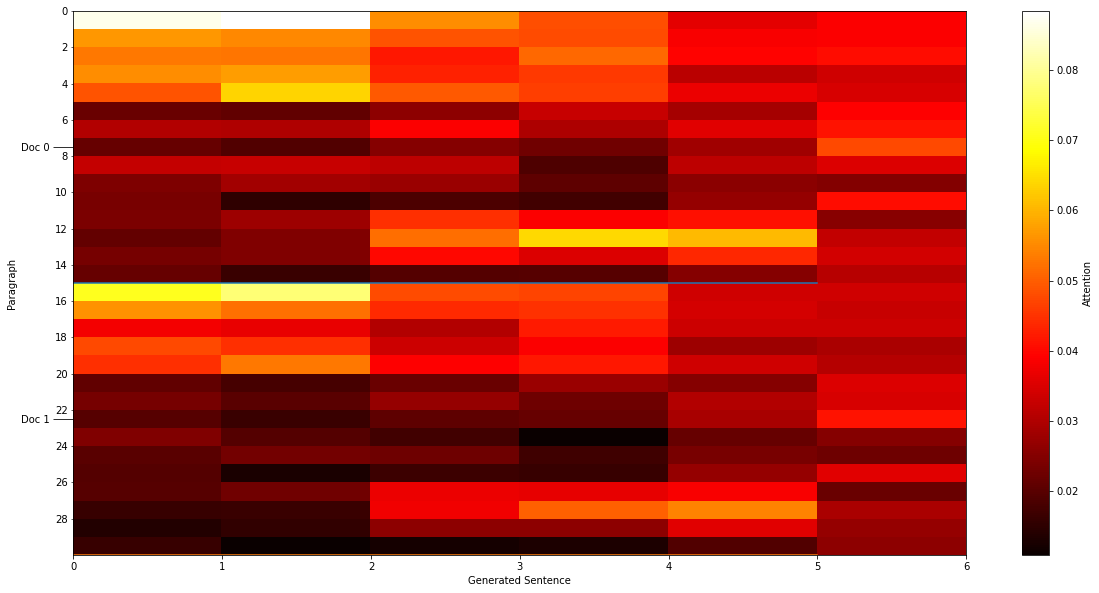

In [86]:
heatmap_sent_simp(result_dict, r["Mean"],example=0)

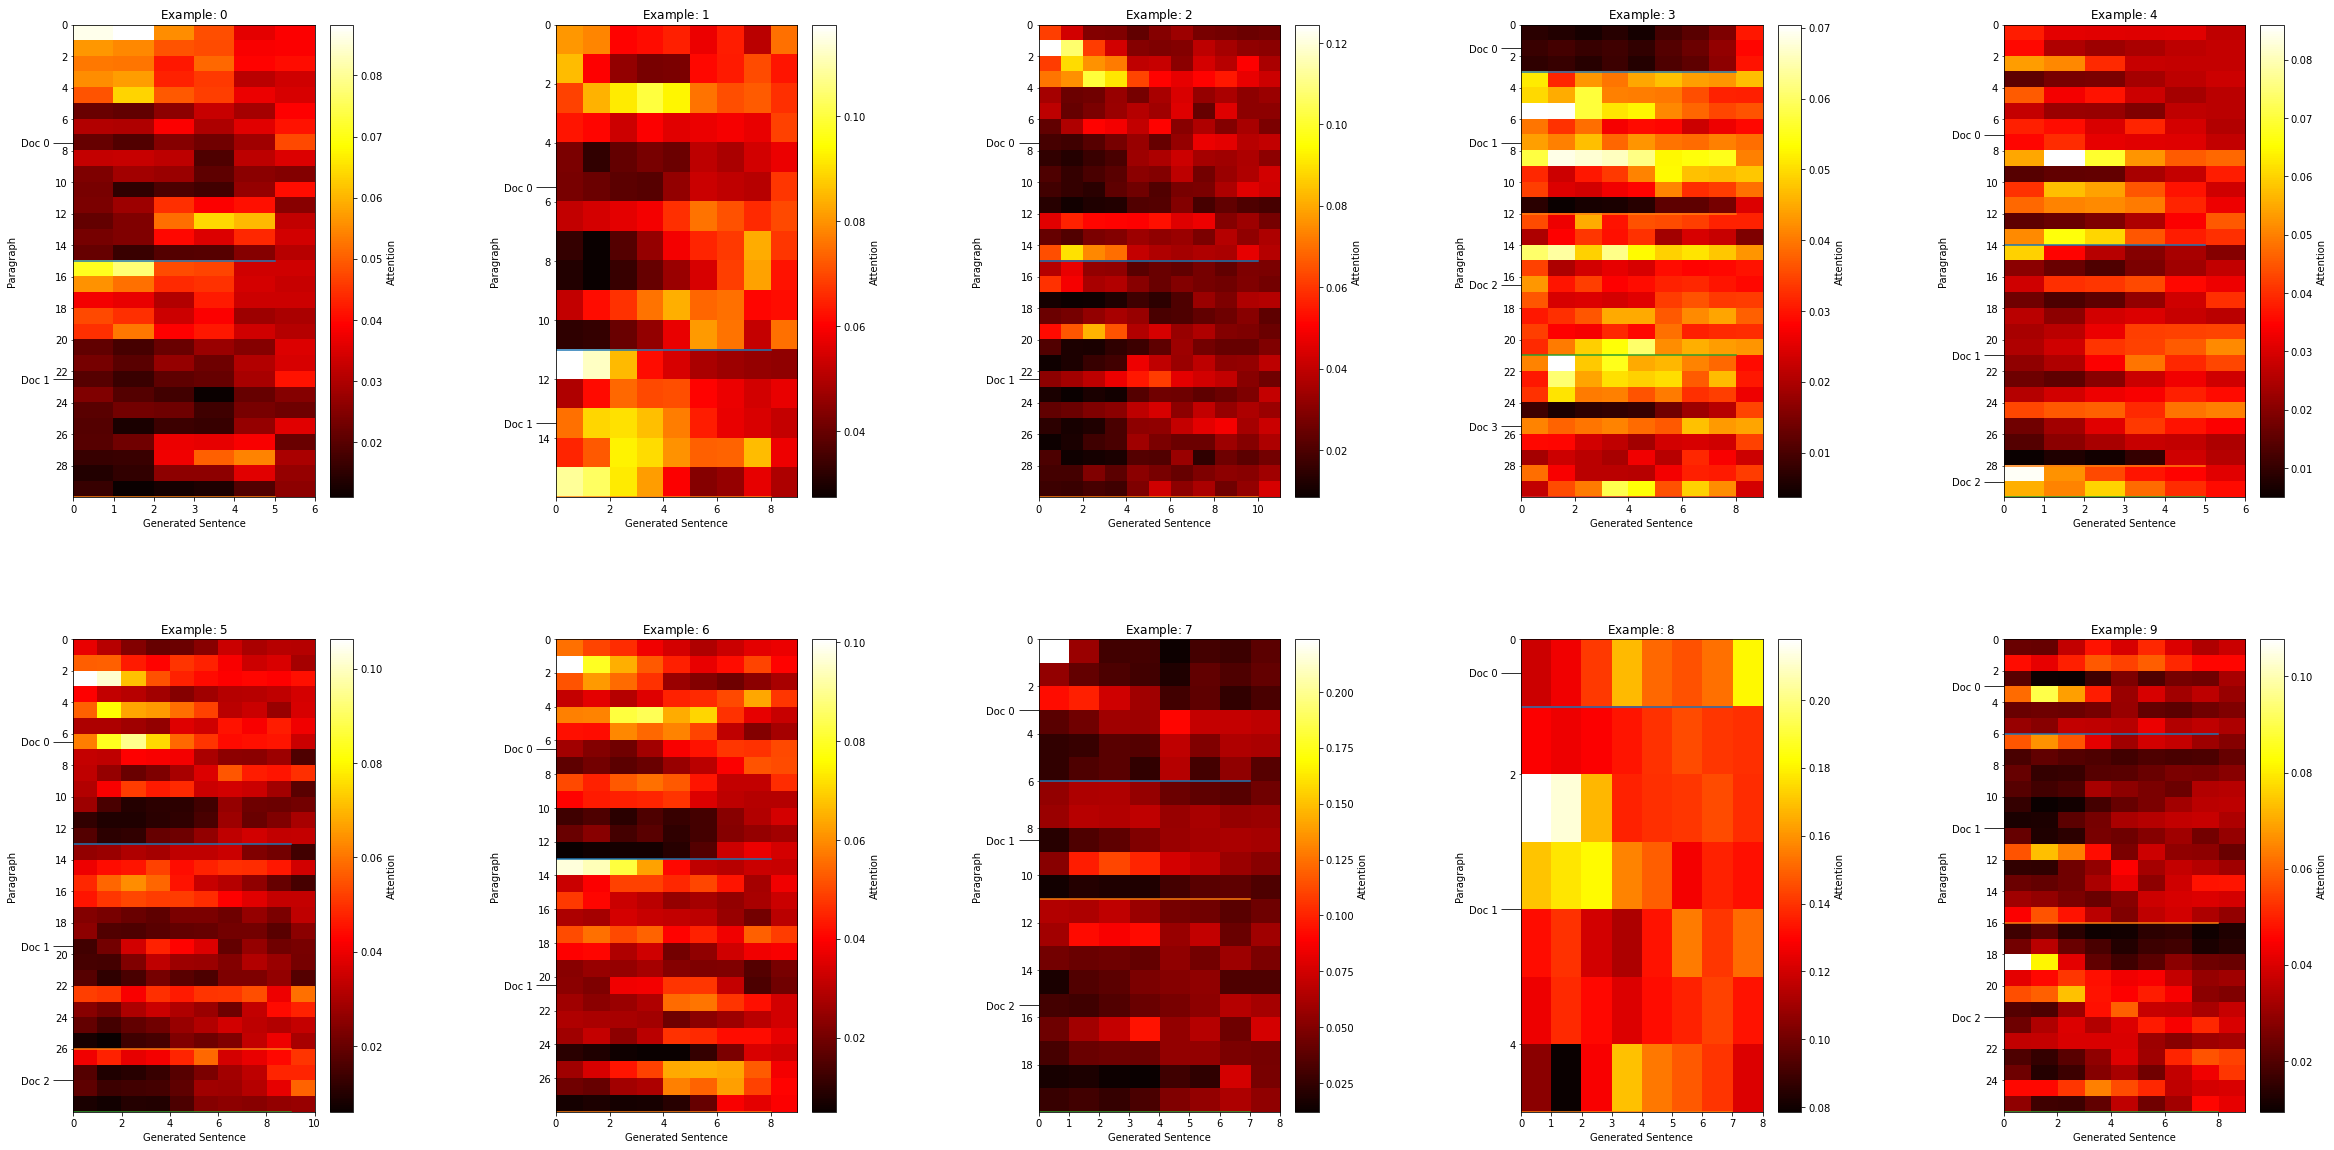

In [68]:
heatmap_sent_multi(result_dict, r["Mean"],size=(40,20))

In [62]:
def heatmap_sent_multi(result_dict, aggregated_weight_matrix, decoding_layer=0, num_multi_head=0, size=(40, 8)):
    fig = plt.figure(figsize=size)

    examples, beam_size, num_generated_sentences, _, _, number_paragraphs = aggregated_weight_matrix.shape
    spec = gridspec.GridSpec(2, examples//2, wspace=0.6, hspace=0.3)

    for i in range(examples):

        ax = fig.add_subplot(spec[i//(examples//2), i % (examples//2)])

        example = i
        ax = heatmap_sent_simp(result_dict, aggregated_weight_matrix,
                          example, decoding_layer, num_multi_head, False, ax)
        ax.set_title(r"Example: $%d$" % (example))

    plt.show()

In [29]:
r["Mean"].shape

(10, 5, 12, 8, 8, 30)

In [15]:
r["Mean"][1,:,:,0,0,:10]

array([[[0.0805293 , 0.08564394, 0.06917164, 0.06307391, 0.04275826,
         0.04215735, 0.05213131, 0.03303247, 0.03084569, 0.05233949],
        [0.07807299, 0.06034666, 0.08435677, 0.06087342, 0.032836  ,
         0.04044218, 0.05458871, 0.02769563, 0.027351  , 0.06220106],
        [0.06065328, 0.04569869, 0.09207353, 0.05369191, 0.03954623,
         0.03849616, 0.05676437, 0.03738576, 0.03351049, 0.06680411],
        [0.06207975, 0.04221972, 0.10004984, 0.05991317, 0.04220194,
         0.03785561, 0.05884672, 0.04604529, 0.03988005, 0.07587005],
        [0.06440912, 0.04269555, 0.0934148 , 0.05628587, 0.0407111 ,
         0.04584856, 0.06654776, 0.05895969, 0.04680609, 0.08382408],
        [0.0579781 , 0.06126981, 0.07559783, 0.05771615, 0.05154164,
         0.05335989, 0.07587404, 0.06525973, 0.05511072, 0.07404803],
        [0.06398449, 0.06395058, 0.07099767, 0.05916622, 0.04912377,
         0.05164787, 0.0712564 , 0.06805124, 0.06867141, 0.07525596],
        [0.05107001, 0.0704

In [13]:
r["Mean"][0,0,11,0,0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
np.argsort(-r["Median"], axis=5)[0,0,0,0,:,:]

array([[ 0, 15,  3,  1,  2, 16, 18,  4, 19, 17,  6,  8, 11, 21, 13,  5,
         9, 12, 14, 10, 20,  7, 22, 26, 23, 25, 24, 29, 27, 28],
       [ 0,  4, 15,  3,  1, 19,  2, 16, 18,  6, 17, 21, 11,  5,  7,  8,
        13, 20, 22, 10, 12,  9, 26, 14, 25, 27, 23, 24, 29, 28],
       [ 0, 15,  3,  1, 16,  4, 19, 18,  2, 17,  6,  5, 11,  8, 13, 20,
        12,  9, 21, 14,  7, 10, 23, 26, 24, 25, 27, 22, 28, 29],
       [22,  7,  6,  0, 15, 21, 17,  2, 25,  5, 20, 10,  4, 14, 29,  3,
        19, 27,  1, 12, 16, 18, 13, 28,  8, 11, 23, 26,  9, 24],
       [ 0, 15,  3,  1, 16,  4, 18,  2, 19, 17,  6, 11,  8, 13,  5, 21,
         7, 12, 10, 14, 20, 22, 26, 23,  9, 25, 29, 28, 27, 24],
       [ 0,  1,  2,  4,  3, 15, 16, 18, 19, 17, 12,  6, 14, 13,  8,  7,
        10, 11,  5, 27, 22, 23, 20, 21, 25, 29,  9, 26, 28, 24],
       [16, 26, 11, 15, 24,  1,  9, 28,  0, 13, 17, 27,  2, 19, 18, 12,
         4,  8,  3,  6, 23, 21,  7, 22, 14, 10, 29, 25, 20,  5],
       [ 0, 15,  2,  1,  4,  3, 19,  8, 1

In [34]:
np.argsort(-r["Mean"], axis=5)[0,0,10,0,0,:]

array([ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12,
       11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29], dtype=int64)

In [16]:
finished_scores_array[6,:,200:230]

array([[-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -11.05198669, -11.0454092 , -11.17138195, -11.14888191,
        -11.1265974 , -11.17399883, -11.15557289, -11.12869167,
        -11.12251186, -11.22120476, -11.21485806,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -10.9281435 , -11.00714302, -11.09377861, -11.08160877,
        -11.05364895, -11.02355099, -11.29302406, -11.27489758,
        -11.32563305, -11.43916893, -11.43182278,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.7055

In [17]:
cleaned_score_matrix[6,:,200:230]

array([[-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -11.05198669, -11.0454092 , -11.17138195, -11.14888191,
        -11.1265974 , -11.17399883, -11.15557289, -11.12869167,
        -11.12251186, -11.22120476, -11.21485806,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -10.9281435 , -11.00714302, -11.09377861, -11.08160877,
        -11.05364895, -11.02355099, -11.29302406, -11.27489758,
        -11.32563305, -11.43916893, -11.43182278,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.7055

In [18]:
finished_scores_array[0,:,200:210]

array([[-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.30475807, -11.43566227,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.18229103,
        -11.3168602 , -11.46519756,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879]])

In [19]:
cleaned_score_matrix[0,:,200:210]

array([[-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.30475807, -11.43566227,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.18229103,
        -11.3168602 , -11.46519756,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879]])

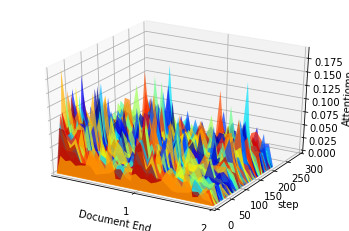

In [21]:
histo_3d_simple(cleaned_weight_matrix, cleaned_score_matrix,result_dict["number_of_textual_units"], (result_dict["longest_beam_array"]-1).astype("int"),decoding_layer=0,example=0)

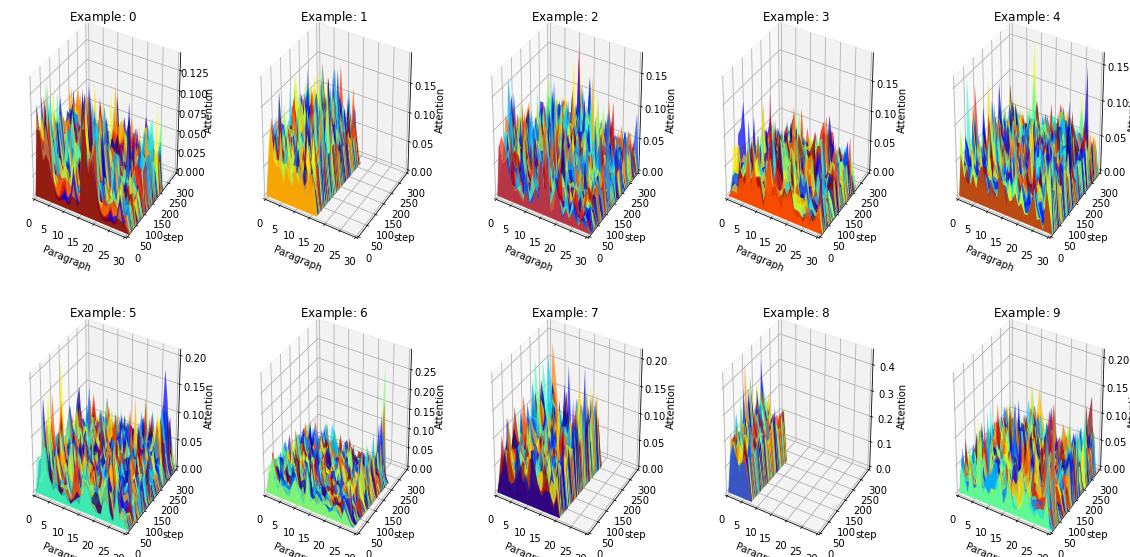

In [22]:
histo_3d_multi(cleaned_weight_matrix, cleaned_score_matrix, (result_dict["longest_beam_array"]-1).astype("int"), decoding_layer=7);

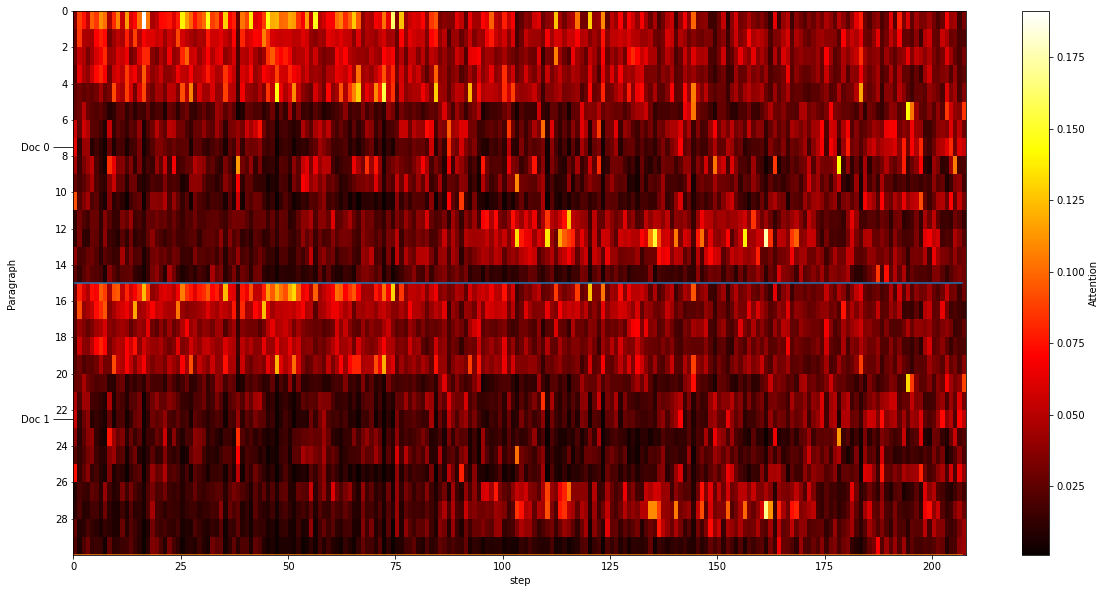

In [23]:
heatmap_simp(result_dict,cleaned_weight_matrix,cleaned_score_matrix, example=0, decoding_layer=0,num_multi_head=0);

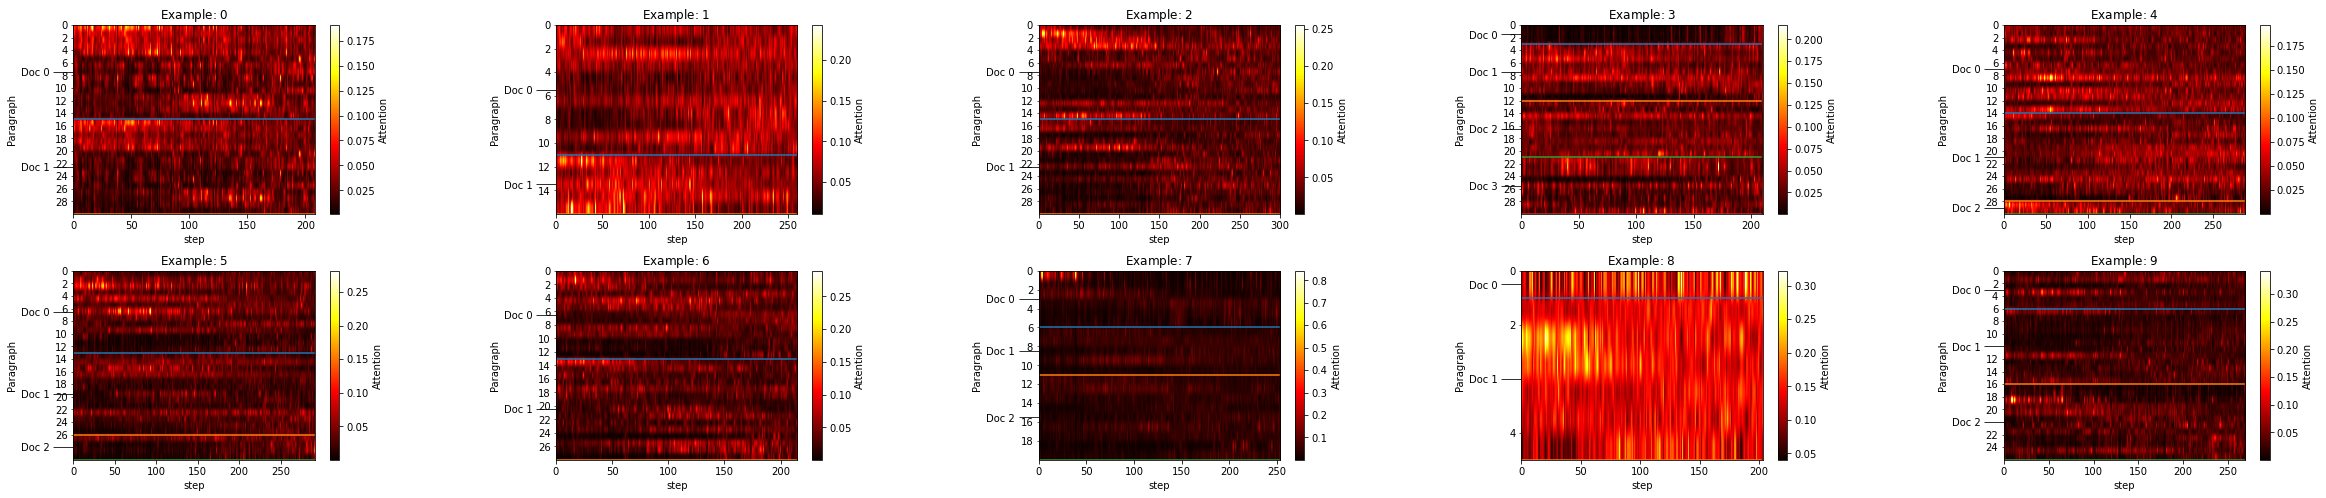

In [24]:
heatmap_multi(result_dict,cleaned_weight_matrix,cleaned_score_matrix, decoding_layer=0,num_multi_head=0, size=(40,8)); # Default values

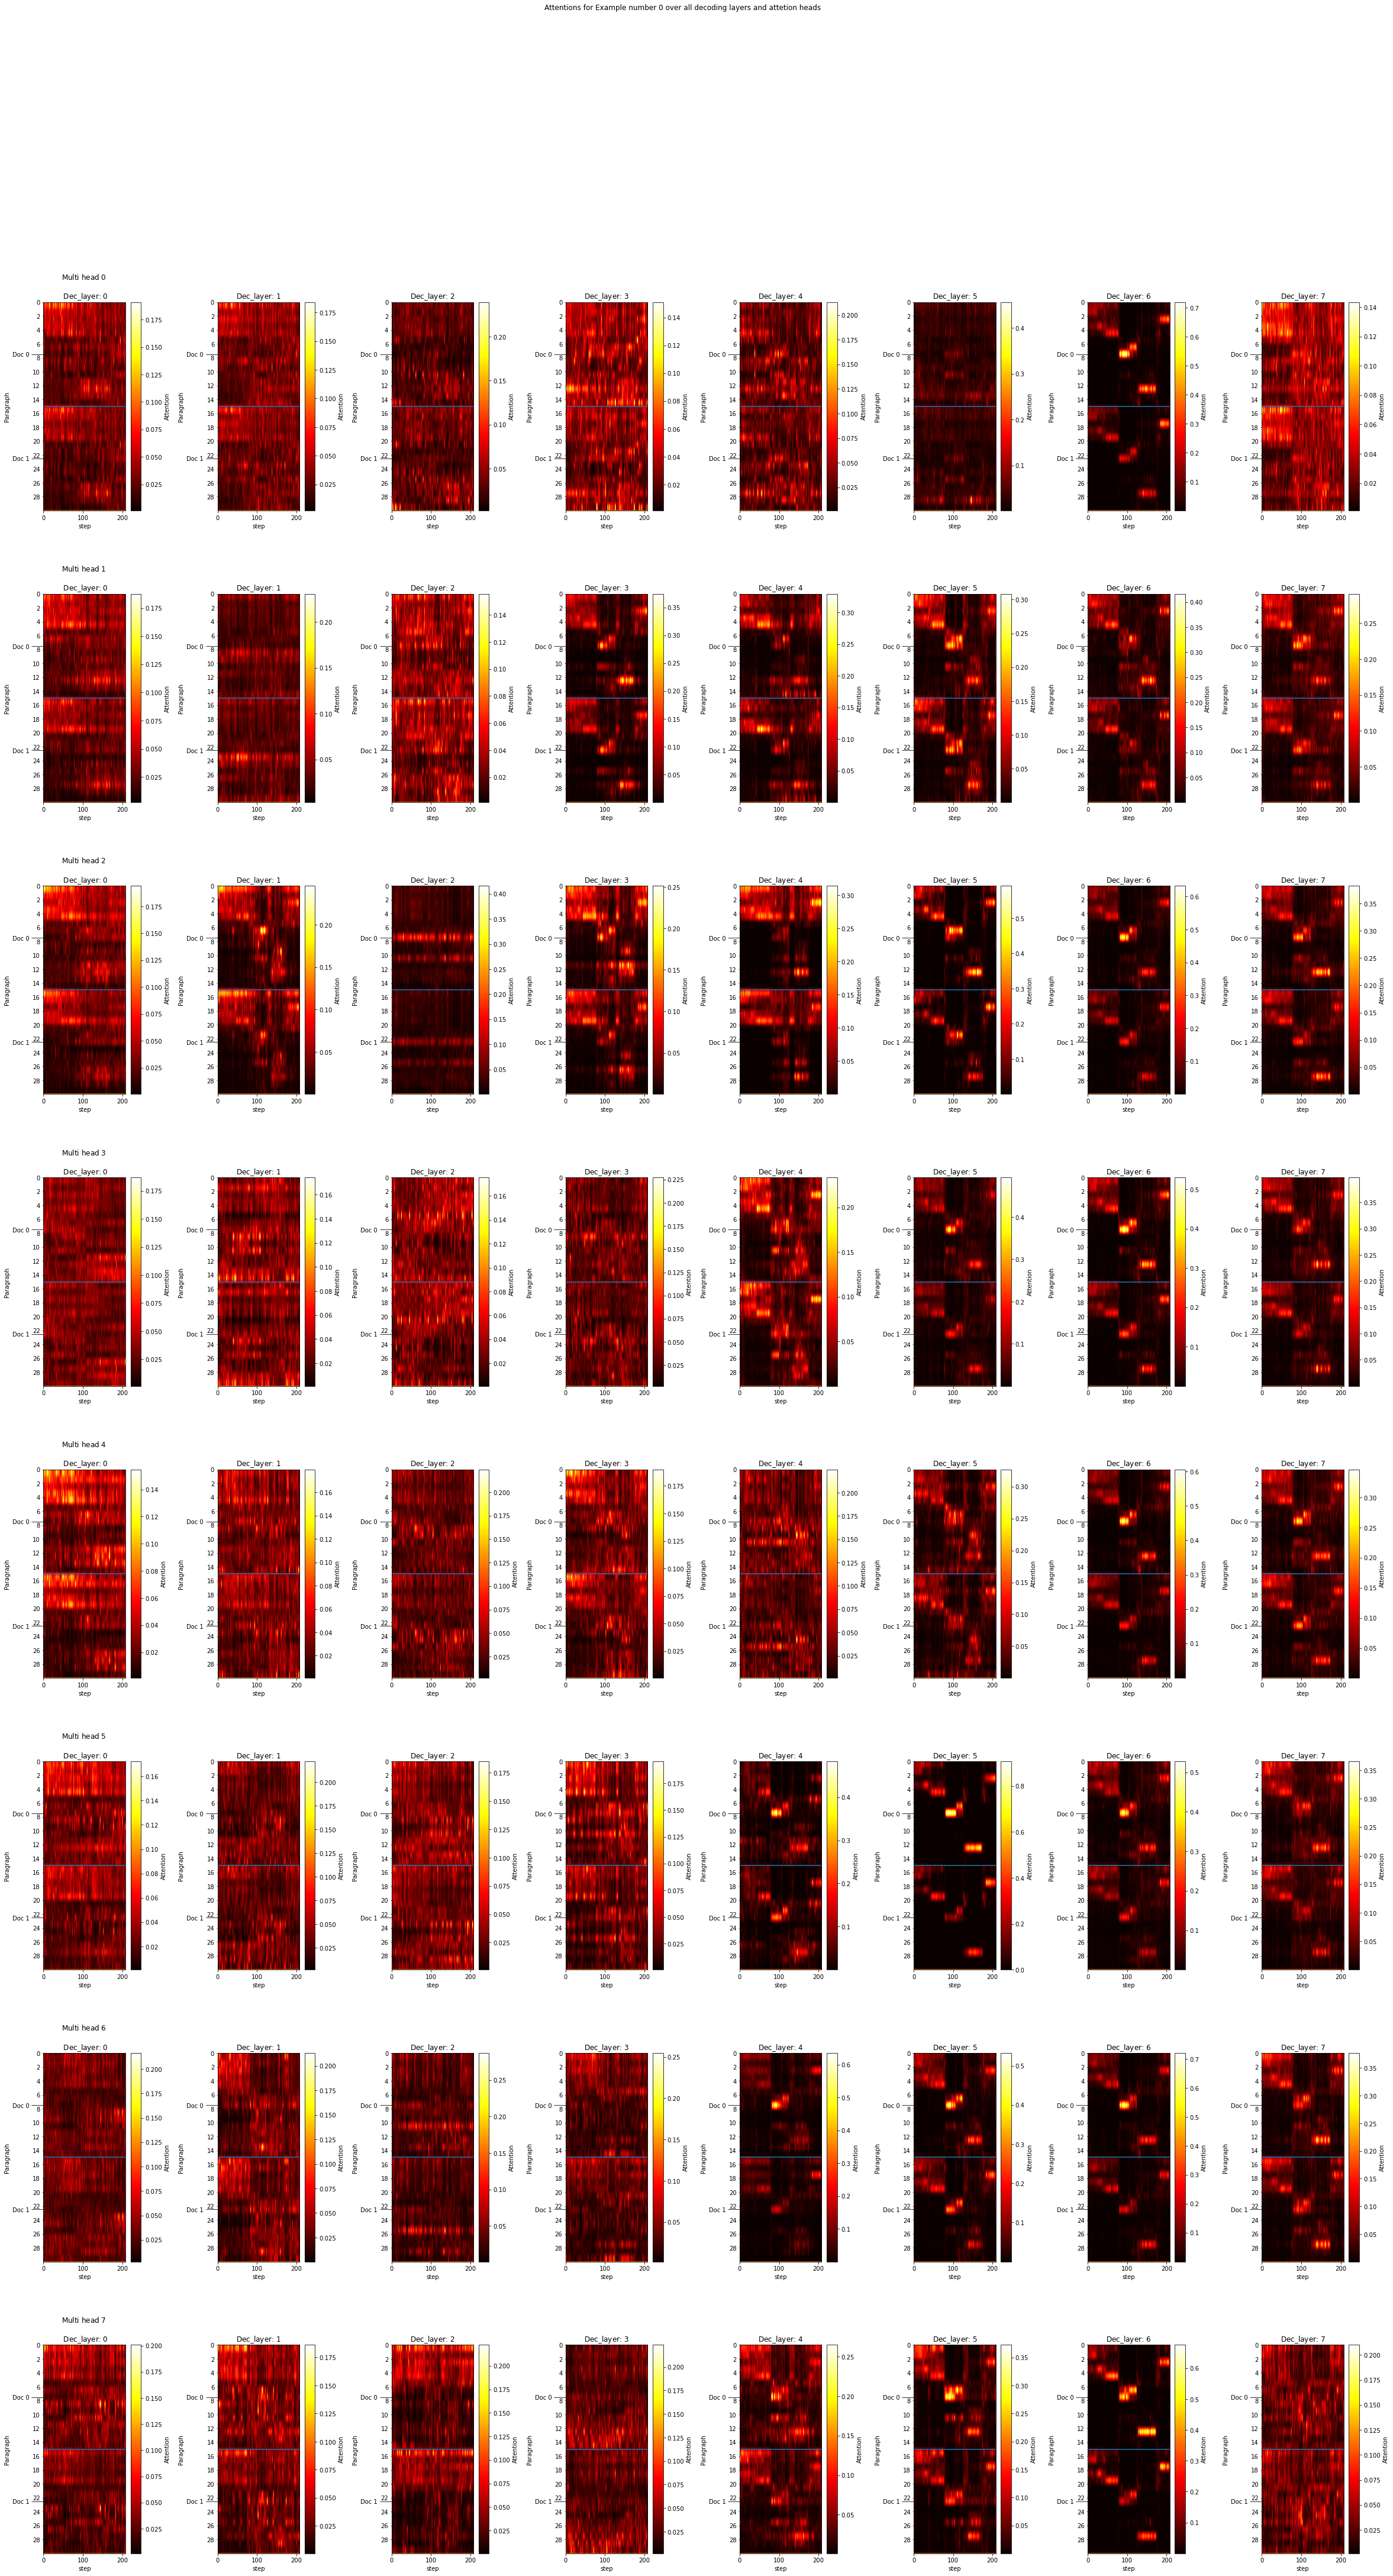

In [25]:
heatmap_att_head(result_dict,cleaned_weight_matrix,cleaned_score_matrix,example=0, size=(40, 70),save=True)

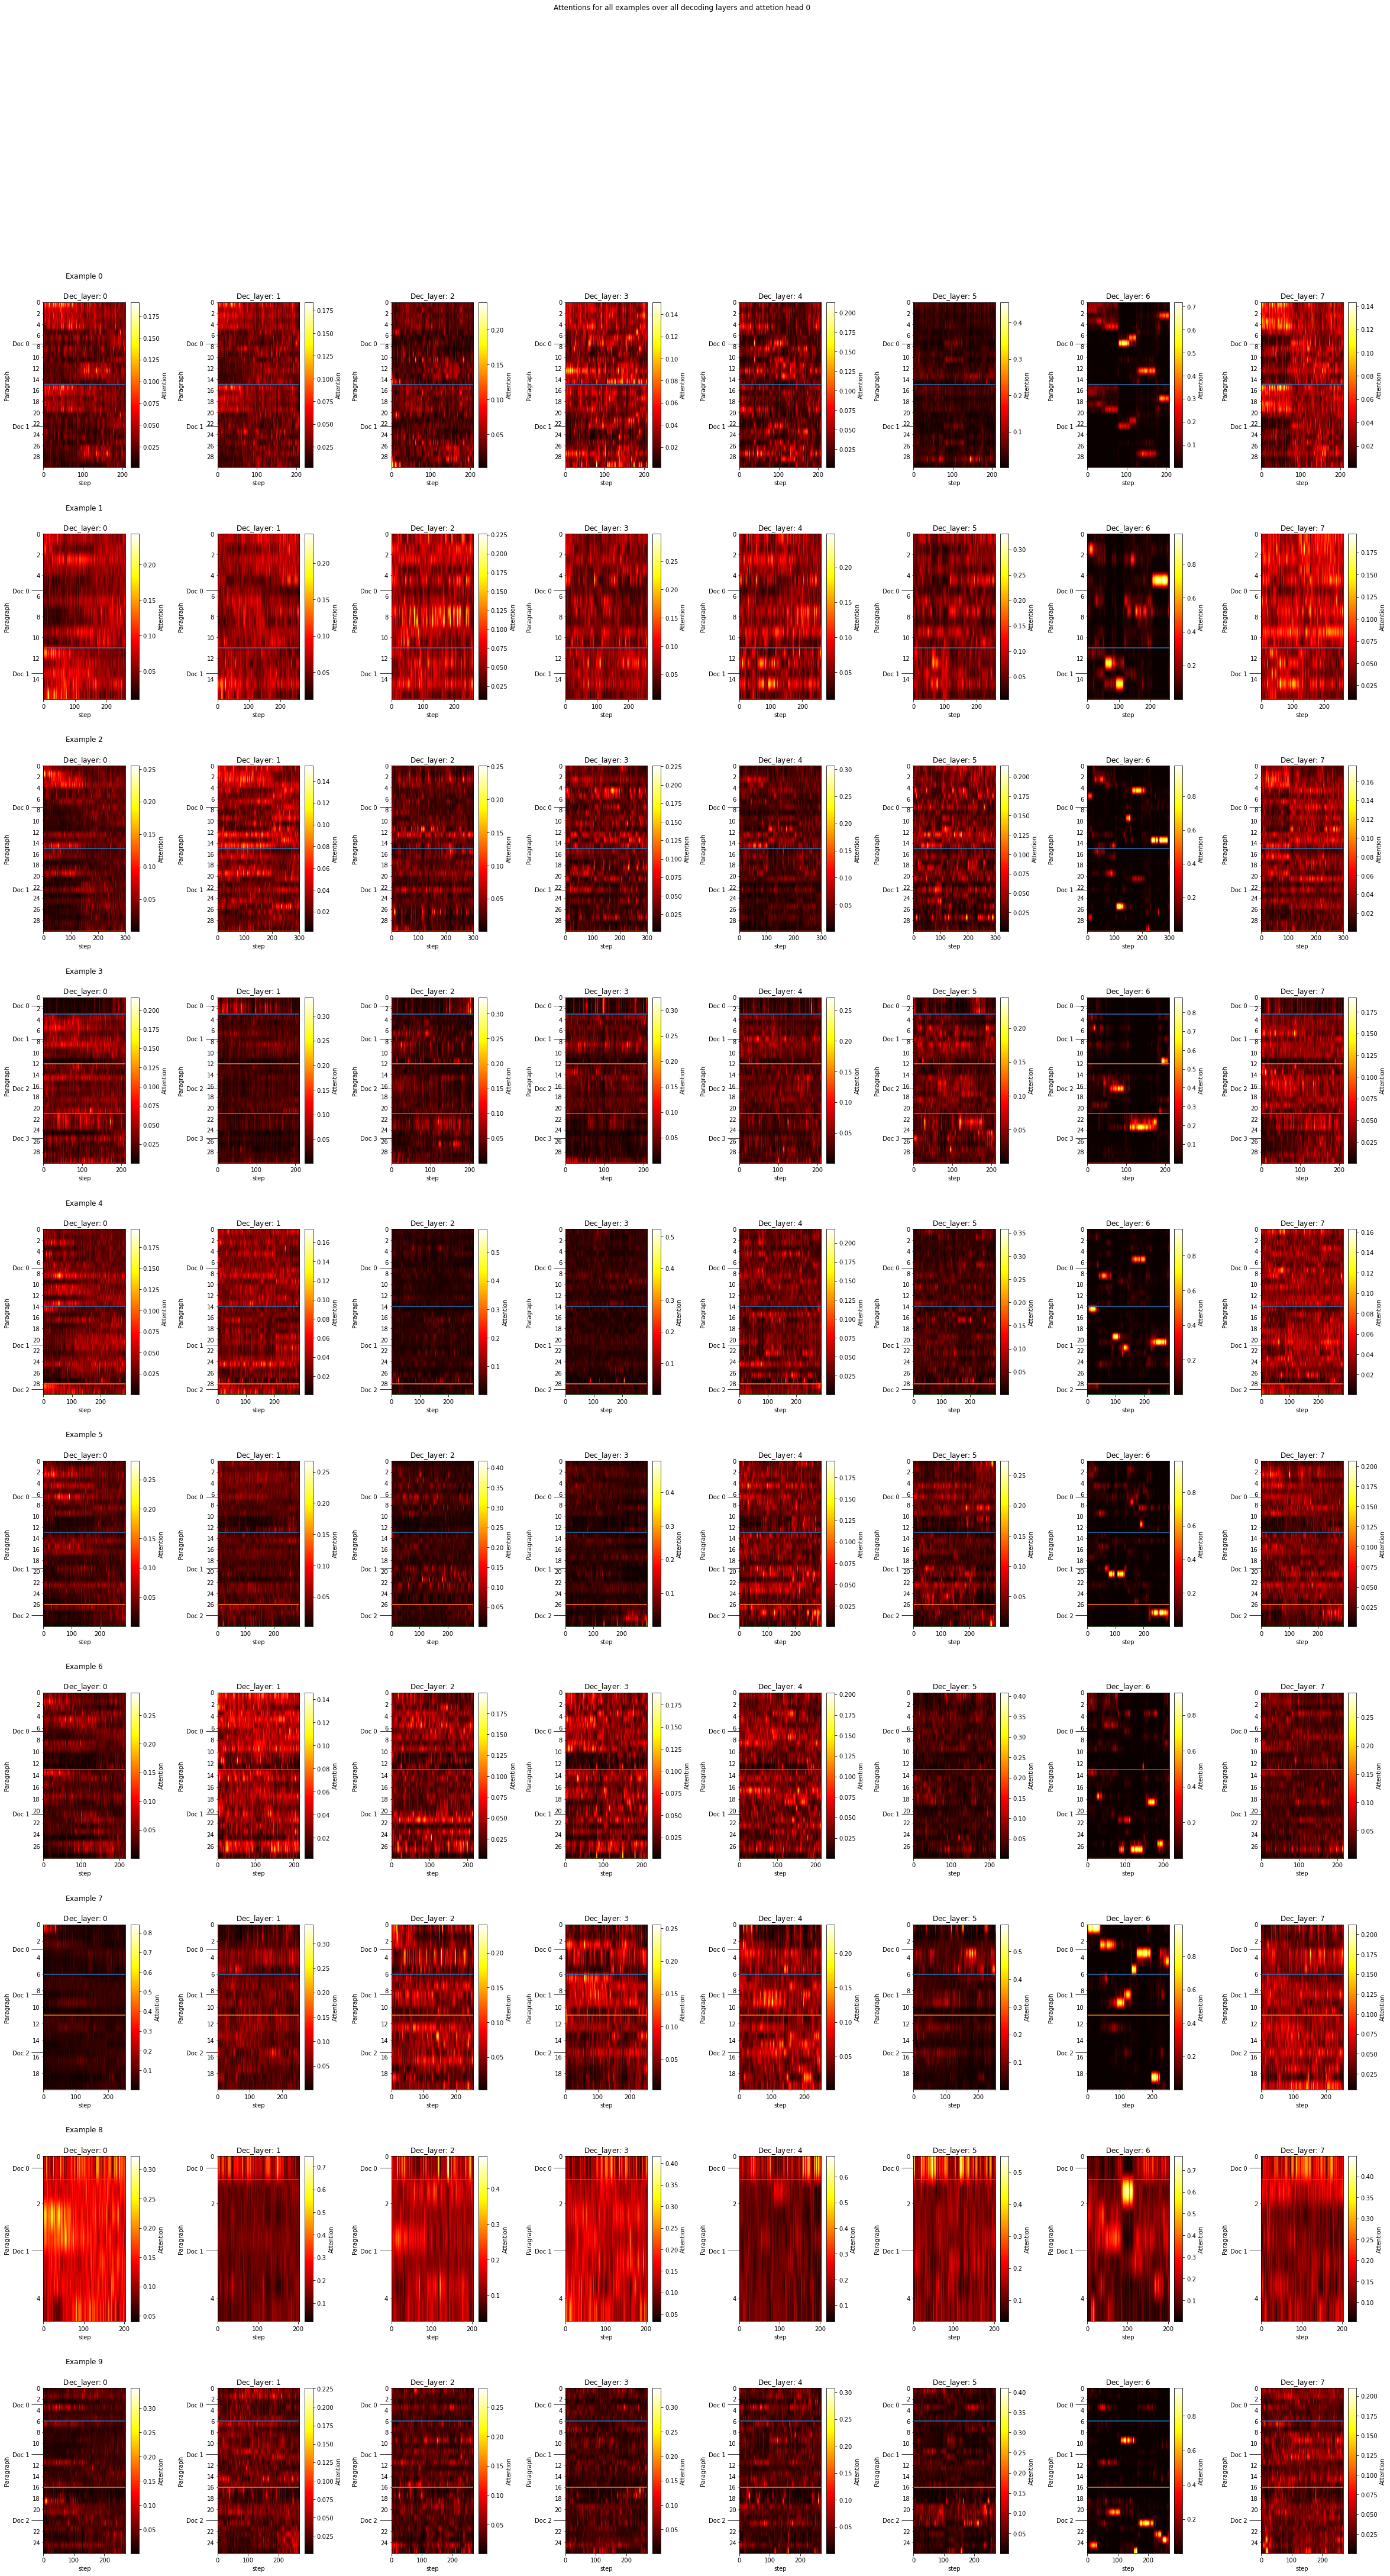

In [26]:
heatmap_dec_layer(result_dict,cleaned_weight_matrix,cleaned_score_matrix,num_multi_head=0, size=(40,70),save=True); # Default values with exeption of save, changing the size could brake the space between subplots

In [ ]:
heatmap_dec_layer(result_dict,cleaned_weight_matrix,cleaned_score_matrix,num_multi_head=1);